In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
dataset = pd.read_csv("./train.csv")

In [3]:
X = dataset.iloc[1:, 0:20].values
y = dataset.iloc[1:, 20].values

In [4]:
# Normalization
for i, x in enumerate(X):
    minVal = np.min(x)
    norm_x = np.subtract(x, minVal)
    maxVal = np.max(norm_x)
    norm_x = np.divide(norm_x, maxVal)
    X[i] = norm_x

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
K_VALUES = [(2 * i + 1) for i in range(1, 10)]
K_ACCURACY = []
for K in K_VALUES:
    match = 0
    total = 0
    for test_point_index, test_point in enumerate(X_test):
        distances_dict = Counter()
        class_count = Counter()

        for index, train_point in enumerate(X_train):
            distances_dict[index] = np.sum(np.square(test_point - train_point))

        for point_index, point in distances_dict.most_common()[-K:]:
            class_count[y_train[point_index]] += 1
        
        if class_count.most_common(1)[0][0] == y_test[test_point_index]:
            match += 1
        total += 1
    K_ACCURACY.append(match / total)

In [7]:
df = []
for i, value in enumerate(K_VALUES):
    df.append([value, K_ACCURACY[i]])
df = pd.DataFrame(df)
df.columns = ['K', 'Accuracy']
df

,K,Accuracy
0,3,0.5650
1,5,0.5850
2,7,0.5500
3,9,0.5900
4,11,0.5650
5,13,0.5750
6,15,0.5675
7,17,0.5700
8,19,0.5800


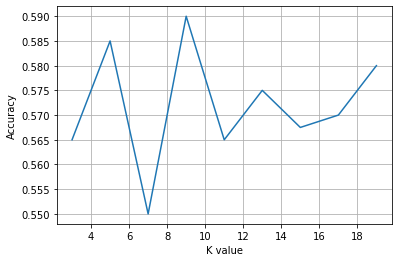

In [8]:
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(K_VALUES, K_ACCURACY)
plt.grid()
plt.show()